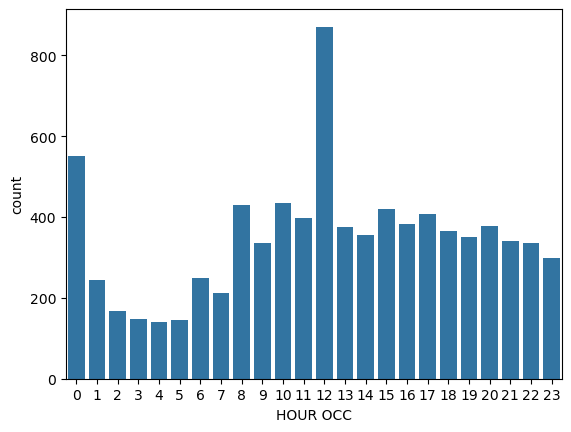

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in and preview the dataset
crimes = pd.read_csv("LA_crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

## Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour

# Extract the first two digits from "TIME OCC", representing the hour,
# and convert to integer data type
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)

# Preview the DataFrame to confirm the new column is correct
crimes.head()

# Produce a countplot to find the largest frequency of crimes by hour
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

# Midday has the largest volume of crime
peak_crime_hour = 12


In [5]:
## Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
## Save as a string variable called peak_night_crime_location
# Filter for the night-time hours
# 0 = midnight; 3 = crimes between 3am and 3:59am, i.e., don't include 4
night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

# Group by "AREA NAME" and count occurrences, filtering for the largest value and saving the "AREA NAME"
peak_night_crime_location = night_time.groupby("AREA NAME", 
                                               as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",
                                                                                               ascending=False).iloc[0]["AREA NAME"]
# Print the peak night crime location
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

## Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+) 
## Save as a pandas Series called victim_ages
# Create bins and labels for victim age ranges
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Add a new column using pd.cut() to bin values into discrete intervals
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

# Find the category with the largest frequency
victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

The area with the largest volume of night crime is 77th Street
Age Bracket
26-34    1996
35-44    1810
45-54    1292
18-25    1272
55-64     998
65+       688
0-17      277
Name: count, dtype: int64
